In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random
import pickle
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import keras
import sys

Using TensorFlow backend.


In [290]:
np.shape(label_)

(551,)

In [293]:
print(type(label_))

<class 'numpy.ndarray'>


In [292]:
label_

array([0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1,
       0, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 1, 1, 1, 4, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 4, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 2, 0, 3, 2, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [291]:
label_== 0

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [3]:
filename = '/home/sxz/data/geolife_Data/Encoded_data_noaug.pickle'
with open(filename, 'rb') as f:
    kfold_dataset2 = pickle.load(f)

In [4]:
kfold_dataset2 = kfold_dataset2[0]

In [5]:
encode_l = np.concatenate((kfold_dataset2[0][0],kfold_dataset2[0][2]))

In [6]:
print(np.shape(encode_l))
encode_l = encode_l.reshape(len(encode_l),31*8)

(551, 1, 31, 8)


In [7]:
label_ = np.concatenate((kfold_dataset2[0][1],kfold_dataset2[0][3]))

In [8]:
print(np.shape(label_l))

NameError: name 'label_l' is not defined

In [9]:
pca = PCA(n_components = 2)

In [10]:
unlabel_pca = pca.fit_transform(encode_l)

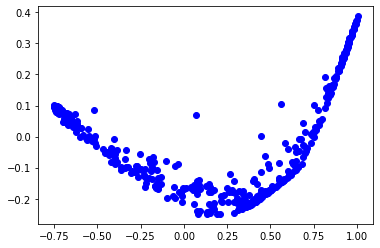

In [11]:
plt.plot(unlabel_pca[:,0],unlabel_pca[:,1],'o',color='blue')

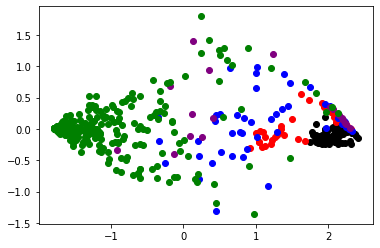

In [286]:
plt.plot(unlabel_pca[label_==0,0],unlabel_pca[label_==0,1],'o',color='black')
plt.plot(unlabel_pca[label_==1,0],unlabel_pca[label_==1,1],'o',color='red')
plt.plot(unlabel_pca[label_==2,0],unlabel_pca[label_==2,1],'o',color='blue')
plt.plot(unlabel_pca[label_==3,0],unlabel_pca[label_==3,1],'o',color='purple')
plt.plot(unlabel_pca[label_==4,0],unlabel_pca[label_==4,1],'o',color='green')

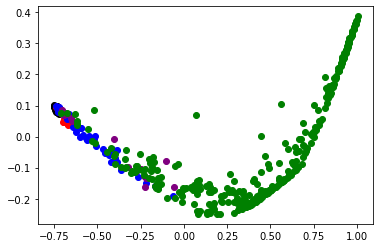

In [14]:
plt.plot(unlabel_pca[label_==0,0],unlabel_pca[label_==0,1],'o',color='black')
plt.plot(unlabel_pca[label_==1,0],unlabel_pca[label_==1,1],'o',color='red')
plt.plot(unlabel_pca[label_==2,0],unlabel_pca[label_==2,1],'o',color='blue')
plt.plot(unlabel_pca[label_==3,0],unlabel_pca[label_==3,1],'o',color='purple')
plt.plot(unlabel_pca[label_==4,0],unlabel_pca[label_==4,1],'o',color='green')

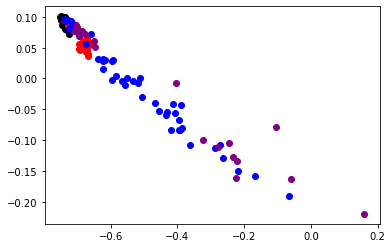

In [17]:
plt.plot(unlabel_pca[label_==0,0],unlabel_pca[label_==0,1],'o',color='black')
plt.plot(unlabel_pca[label_==1,0],unlabel_pca[label_==1,1],'o',color='red')
plt.plot(unlabel_pca[label_==2,0],unlabel_pca[label_==2,1],'o',color='blue')
plt.plot(unlabel_pca[label_==3,0],unlabel_pca[label_==3,1],'o',color='purple')

In [27]:
filename = '/home/sxz/data/geolife_Data/Encoded_data.pickle'
with open(filename, 'rb') as f:
    kfold_dataset1 = pickle.load(f)

In [45]:
kfold_dataset = kfold_dataset1[:][0].reshape(len(kfold_dataset1[:][0]),31*128)

In [46]:
pca_ = PCA(n_components=2)

In [47]:
label_ = kfold_dataset1[:][1]

In [48]:
label

array([0, 0, 0, ..., 4, 4, 4])

In [49]:
unlabel_pca = pca_.fit_transform(kfold_dataset)

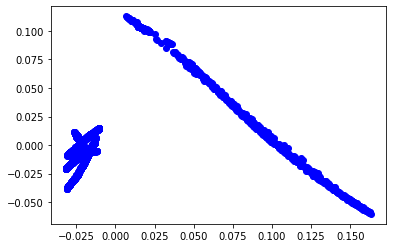

In [50]:
plt.plot(unlabel_pca[:,0],unlabel_pca[:,1],'o',color='blue')

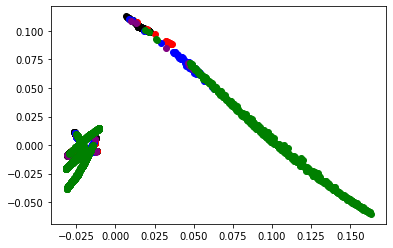

In [37]:
plt.plot(unlabel_pca[label_==0,0],unlabel_pca[label_==0,1],'o',color='black')
plt.plot(unlabel_pca[label_==1,0],unlabel_pca[label_==1,1],'o',color='red')
plt.plot(unlabel_pca[label_==2,0],unlabel_pca[label_==2,1],'o',color='blue')
plt.plot(unlabel_pca[label_==3,0],unlabel_pca[label_==3,1],'o',color='purple')
plt.plot(unlabel_pca[label_==4,0],unlabel_pca[label_==4,1],'o',color='green')

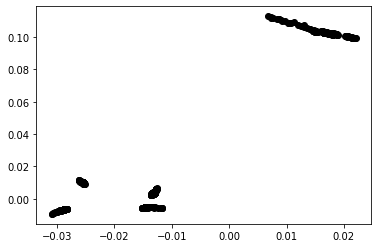

In [38]:
plt.plot(unlabel_pca[label_==0,0],unlabel_pca[label_==0,1],'o',color='black')

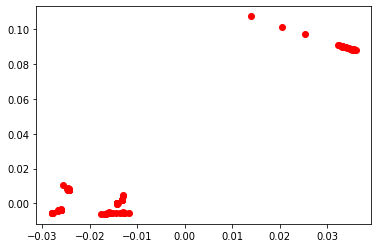

In [39]:
plt.plot(unlabel_pca[label_==1,0],unlabel_pca[label_==1,1],'o',color='red')

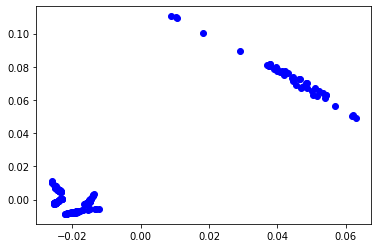

In [40]:
plt.plot(unlabel_pca[label_==2,0],unlabel_pca[label_==2,1],'o',color='blue')

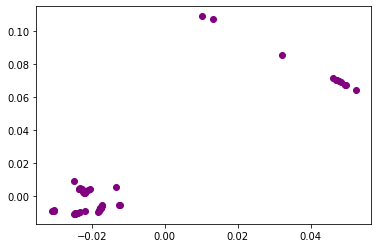

In [41]:
plt.plot(unlabel_pca[label_==3,0],unlabel_pca[label_==3,1],'o',color='purple')

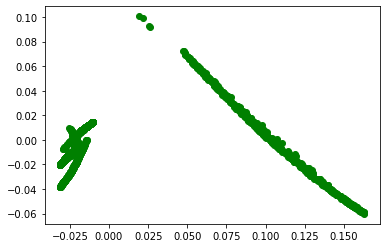

In [42]:
plt.plot(unlabel_pca[label_==4,0],unlabel_pca[label_==4,1],'o',color='green')

(17002880,)


In [3]:
print(encode_)

[0.0070365  0.00981052 0.0070365  ... 0.00783143 0.00736508 0.00693457]


In [3]:
encode_ = encode_.reshape(4285,2)

In [4]:
encode_

array([[ 0.05722877,  0.01484209],
       [ 0.05676095,  0.01444434],
       [ 0.05667583,  0.01430757],
       ...,
       [ 0.008645  ,  0.00387152],
       [ 0.01245211, -0.00019142],
       [ 0.01994353, -0.00793262]], dtype=float32)

In [5]:
label_ = np.fromfile("label.bin",dtype = np.int64)

In [31]:
label_==0

array([ True,  True,  True, ..., False, False, False])

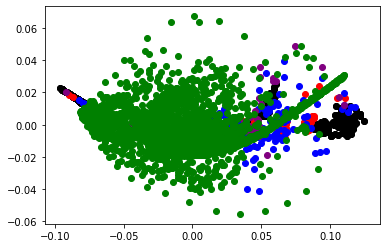

In [36]:

plt.plot(encode_[label_==0,0],encode_[label_==0,1],'o',color='black')
plt.plot(encode_[label_==1,0],encode_[label_==1,1],'o',color='red')
plt.plot(encode_[label_==2,0],encode_[label_==2,1],'o',color='blue')
plt.plot(encode_[label_==3,0],encode_[label_==3,1],'o',color='purple')
plt.plot(encode_[label_==4,0],encode_[label_==4,1],'o',color='green')

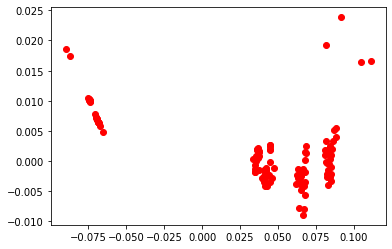

In [37]:
plt.plot(encode_[label_==1,0],encode_[label_==1,1],'o',color='red')

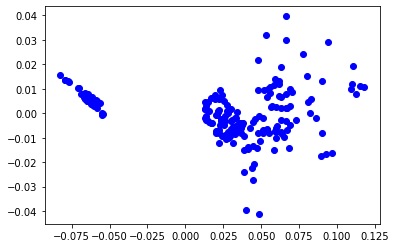

In [38]:
plt.plot(encode_[label_==2,0],encode_[label_==2,1],'o',color='blue')

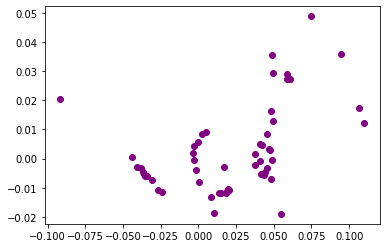

In [39]:
plt.plot(encode_[label_==3,0],encode_[label_==3,1],'o',color='purple')

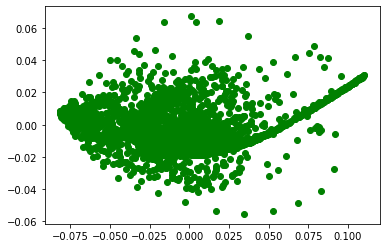

In [40]:
plt.plot(encode_[label_==4,0],encode_[label_==4,1],'o',color='green')

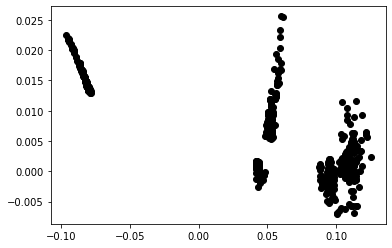

In [41]:
plt.plot(encode_[label_==0,0],encode_[label_==0,1],'o',color='black')

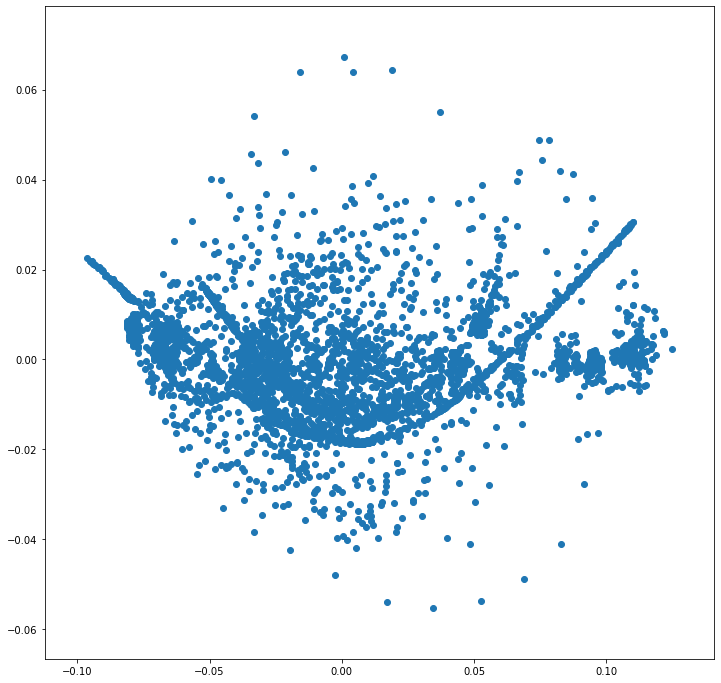

In [7]:
plt.figure(figsize=[12,12])
plt.scatter(x = [i[0] for i in encode_],y = [i[1] for i in encode_])

(4285,)


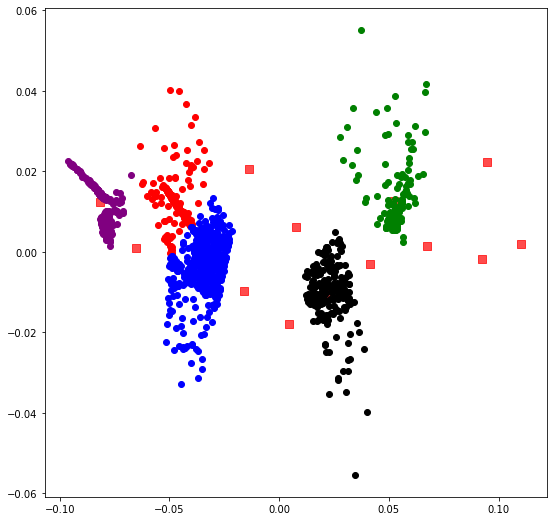

In [8]:
plt.figure(figsize=[9,9])

cluster_num = 15
km5 = KMeans(n_clusters=cluster_num, init='random',max_iter=300,n_init=10,random_state=0)
encode_means = km5.fit_predict(encode_)
print(np.array(encode_means).shape)
plt.plot(encode_[encode_means==0,0],encode_[encode_means==0,1],'o',color='black')
plt.plot(encode_[encode_means==1,0],encode_[encode_means==1,1],'o',color='red')
plt.plot(encode_[encode_means==2,0],encode_[encode_means==2,1],'o',color='blue')
plt.plot(encode_[encode_means==3,0],encode_[encode_means==3,1],'o',color='purple')
plt.plot(encode_[encode_means==4,0],encode_[encode_means==4,1],'o',color='green')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=50,marker='s', c='red',
            alpha=0.7, label='Centroids')

In [9]:
def select_label(cluster_set , cluster_center):
    minimun = 100
    distance = np.sqrt(np.sum(np.square(cluster_set[i] , cluster_center)))

In [10]:
mini = np.zeros((cluster_num), dtype=np.float)
mini_coodinate = np.zeros((cluster_num,2), dtype=np.float)

In [11]:
for i in range(cluster_num):
    mini[i] = 100
count = 0
for j in range(cluster_num):
    for i in range(len(encode_[encode_means==j])):
            if(mini[j] >(np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))):
                mini[j] = (np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))
                mini_coodinate[j] = encode_[encode_means==j][i]

In [12]:
print(mini)
print(mini_coodinate)

[0.00115588 0.00034049 0.00025975 0.00146672 0.00071621 0.00037089
 0.00038343 0.00114225 0.00112295 0.00070258 0.00126097 0.00083974
 0.00030139 0.00010767 0.0002885 ]
[[ 0.02353782 -0.01003143]
 [-0.04805908  0.01303101]
 [-0.03533618 -0.00264259]
 [-0.08088472  0.01365081]
 [ 0.05280674  0.01320168]
 [ 0.00448791 -0.01822771]
 [ 0.09221637 -0.00225276]
 [-0.01282828  0.02113833]
 [ 0.0080792   0.00721297]
 [-0.01616831 -0.00919195]
 [ 0.09569743  0.0214657 ]
 [ 0.0680269   0.00151261]
 [ 0.11057957  0.00209735]
 [-0.06512401  0.00089912]
 [ 0.04142942 -0.00266608]]


In [13]:
cluster_fake = np.zeros(cluster_num,)

In [14]:
print(len(encode_))

4285


In [15]:
# plt.scatter(x = [i[0] for i in encode_],y = [i[1] for i in encode_])
for j in range(cluster_num):
    for i in range(len(encode_)):
        if(mini_coodinate[j][0] == encode_[i][0]):
            cluster_fake[j] = label_[i]

In [16]:
cluster_fake

array([4., 4., 4., 0., 0., 4., 0., 4., 4., 4., 4., 1., 0., 4., 1.])

In [17]:
label_fake = np.zeros(4285,)

In [18]:
for i in range(cluster_num):
    label_fake[encode_means==i] =cluster_fake[i]

In [19]:
print(label_fake)
print(label_)

[0. 0. 0. ... 4. 4. 4.]
[0 0 0 ... 4 4 4]


In [20]:
count = 0
for i in range(len(label_)):
    if(label_fake[i] == label_[i]):
        count = count+1
print(count)
print('accuracy for unsupervised model is : {}'.format(count/4285))

3449
accuracy for unsupervised model is : 0.8049008168028005


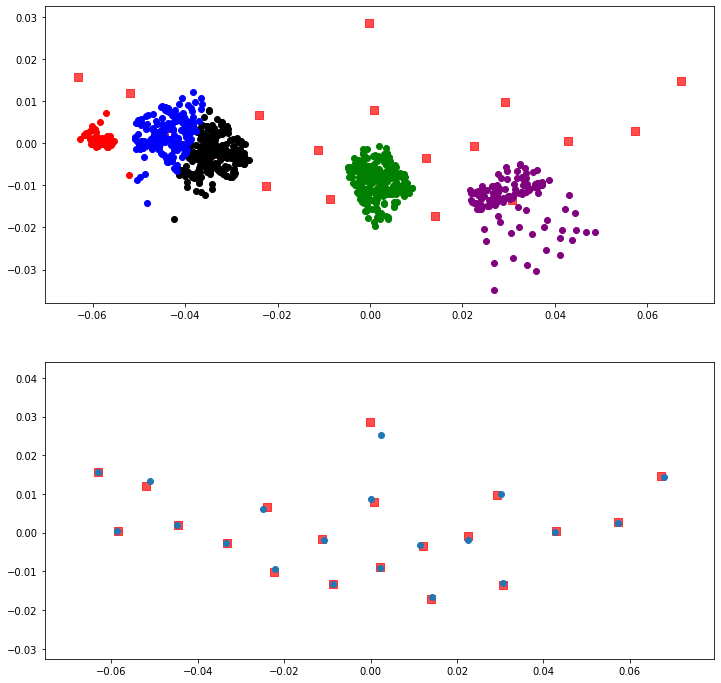

In [346]:
plt.figure(figsize=[12,12])
plt.subplot(2,1,1)
plt.plot(encode_[encode_means==0,0],encode_[encode_means==0,1],'o',color='black')
plt.plot(encode_[encode_means==1,0],encode_[encode_means==1,1],'o',color='red')
plt.plot(encode_[encode_means==2,0],encode_[encode_means==2,1],'o',color='blue')
plt.plot(encode_[encode_means==3,0],encode_[encode_means==3,1],'o',color='purple')
plt.plot(encode_[encode_means==4,0],encode_[encode_means==4,1],'o',color='green')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=50,marker='s', c='red',
            alpha=0.7, label='Centroids')
plt.subplot(2,1,2)
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=50,marker='s', c='red',
            alpha=0.7, label='Centroids')
plt.scatter(x = [i[0] for i in mini_coodinate],y = [i[1] for i in mini_coodinate])

In [22]:
[km5.cluster_centers_[0,0],km5.cluster_centers_[0,1]]

[0.023371406, -0.001472217]

In [23]:
encode_[encode_means==i]

array([], shape=(0, 2), dtype=float32)

In [24]:
for i in range(5):
    print(len(encode_[encode_means==i]))

791
1140
776
852
726


In [25]:
for i in range(5):
    print(len(label_[label_==i]))

752
132
227
54
3120


In [26]:
i= 0 
temp =np.zeros(10000)

In [27]:
temp[2] = count/4285
temp

array([0.        , 0.        , 0.03500583, ..., 0.        , 0.        ,
       0.        ])

In [149]:
##下面做去弱标签混淆聚类

In [22]:
encode_r = np.fromfile("encodeAE.bin",dtype=np.float32)
encode_r = encode_.reshape(4285,2)
label_r = np.fromfile("label.bin",dtype = np.int64)


In [23]:
random_sample = np.random.choice(len(encode_r),size=(len(encode_r)),replace=False, p=None)

In [24]:
random_sample

array([1706,  434, 1314, ..., 1602, 4003,  287])

In [25]:
encode_r = encode_r[random_sample]
label_r = label_r[random_sample]
for i in range(int(len(label_r)*0.5)):
    label_r[i]=100
print(label_r)

[100 100 100 ...   4   4   4]


In [26]:
plt.figure(figsize=[9,9])

cluster_numr = 12

km5 = KMeans(n_clusters=cluster_numr, init='random',max_iter=300,n_init=10,random_state=0)
encode_meansr = km5.fit_predict(encode_)

<Figure size 648x648 with 0 Axes>

In [27]:
label_r[encode_meansr == 1][1]

100

In [44]:
for i in range(cluster_numr):
    mini[i] = 100
count = 0
for j in range(cluster_numr):
    for i in range(len(encode_[encode_meansr==j])):
        if(label_r[encode_meansr==j][i] != 100):
            if(mini[j] >(np.sqrt(np.sum(np.square(encode_r[encode_meansr==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))):
                mini[j] = (np.sqrt(np.sum(np.square(encode_r[encode_meansr==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))
                mini_coodinate[j] = encode_r[encode_meansr==j][i]

In [29]:
print(mini)
print(mini_coodinate)

[1.81367539e-03 7.70590603e-02 1.40197203e-02 9.32140625e-04
 2.99733179e-03 4.93282045e-04 7.76592456e-03 8.25532675e-02
 1.39613124e-03 7.38296807e-02 7.65129458e-04 1.20589072e-02
 3.17478599e-03 1.02303806e-03 5.26935840e-03 2.32682354e-03
 9.43320058e-03 5.55584021e-03 1.56123700e-04 6.86276180e-04
 3.96314746e-04 5.33918326e-04 6.87849824e-04 9.36419144e-03
 3.12046730e-04 7.72513624e-04 2.81549903e-04 6.09996096e-05
 1.30483566e-03 5.41412272e-03]
[[-1.60387494e-02  2.21301196e-03]
 [ 1.54527435e-02  3.34235057e-02]
 [ 1.31670386e-01  4.78610210e-02]
 [ 4.94701266e-02 -1.95315969e-03]
 [ 8.17964673e-02  8.28557648e-03]
 [-4.61274721e-02 -9.94201866e-04]
 [-8.62267986e-02  1.41435200e-02]
 [ 8.58089849e-02 -8.82058172e-04]
 [ 1.91422775e-02  7.10773980e-03]
 [-8.50811601e-02  1.45610115e-02]
 [ 3.81856109e-03 -2.00967994e-02]
 [ 2.23758623e-01 -4.12042672e-03]
 [ 3.51141319e-02  4.04283553e-02]
 [ 1.18664186e-03  1.57149825e-02]
 [ 6.55523464e-02 -9.22680050e-02]
 [ 1.55775607e-0

In [46]:
cluster_faker = np.zeros(cluster_numr,)
for j in range(cluster_numr):
    for i in range(len(encode_r)):
        if(mini_coodinate[j].any() == encode_r[i].any()):
            cluster_faker[j] = label_r[i]